# Simple Linear Regression

## Dataset
Penguin dataset is available with seaborn library and serves as replacement/alternate for iris dataset. This datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

In [1]:
# imports
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [4]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
penguins.describe()


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

## Missing Values 

In [26]:
# function to summarize missing values by columns
def missing_value_summary(df):
    for column in penguins.columns:
        print("{} - {} counts of missing values.".format(column, df[column].isna().sum()))

missing_value_summary(penguins)

species - 0 counts of missing values.
island - 0 counts of missing values.
bill_length_mm - 2 counts of missing values.
bill_depth_mm - 2 counts of missing values.
flipper_length_mm - 2 counts of missing values.
body_mass_g - 2 counts of missing values.
sex - 11 counts of missing values.


## Data Cleaning

For the analysis we only want to keep species Adelie and Gento

In [29]:
penguins_extract = penguins[penguins['species'] != "Chinstrap"]

# Dropping all the missing values from the extracted data
df = penguins_extract.dropna()

# resetting the index for rows after dropping the rows with missing values
df.reset_index(inplace=True, drop=True)

# displaying first 5 rows of the cleaned data
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male

## Exploratory Data Analysis

we want to use pairplot function from seaborn library to quickly check relationships between pairs using scatterplot

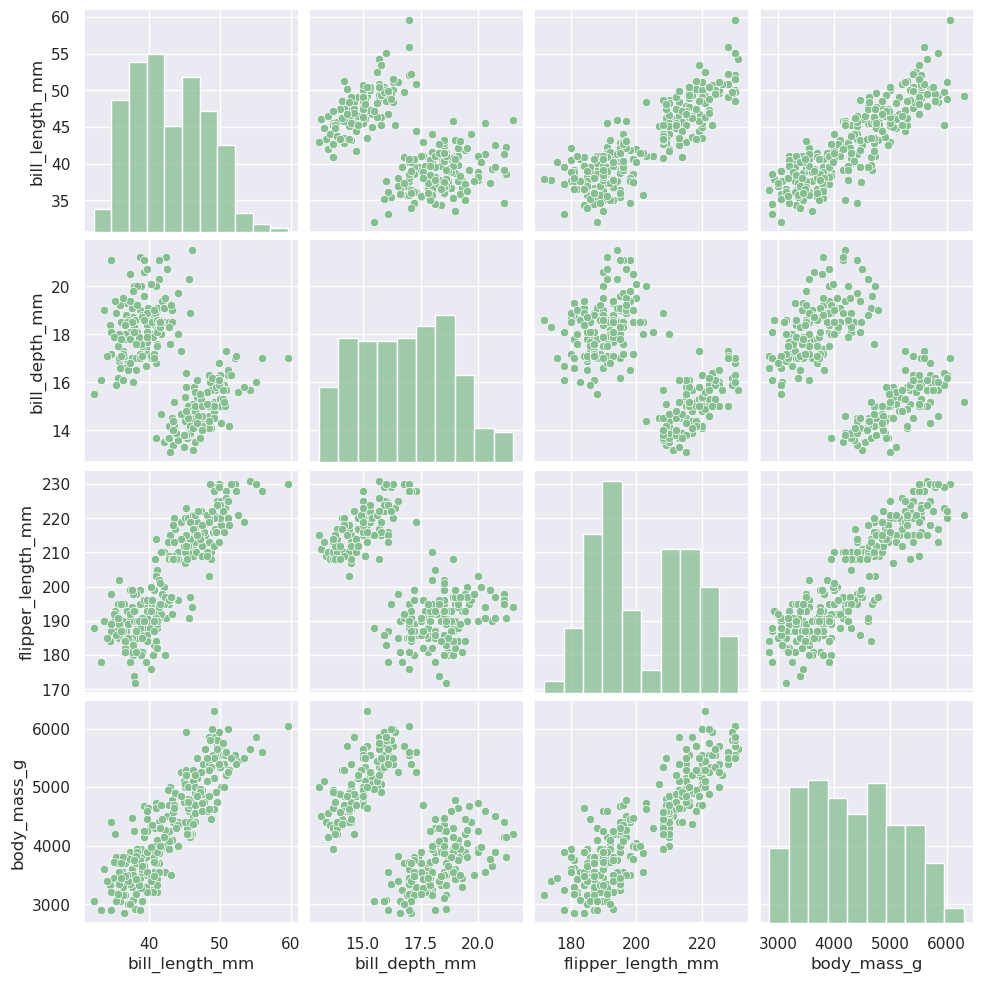

In [39]:
sns.set_palette('crest', 8)
sns.pairplot(df)

### Observed Linear Relationships

- Bill Length and Body Mass
- Bill Length and Flipper Length
- Flipper Length and Body Mass


## Model Construction : Simple Linear Regression

Based on the above observed relationship we can pick any of the 3 relationships. We will begin by exploring relationship between **bill_length_mm** and **body_mass_g**

In [41]:
# Creating subset of the data with the variables of interest from the dataframe
ols_data = df[["bill_length_mm", "body_mass_g"]]
ols_data.head(3)

bill_length_mm  body_mass_g
0            39.1       3750.0
1            39.5       3800.0
2            40.3       3250.0

Next, construct the linear regression formula, and save it as a string. format is as  **y ~ x**, where *y* is the dpendent variable and *x* is the independent variable

In [42]:
ols_formula = "body_mass_g ~ bill_length_mm"

Build the **simple linear regression model in statsmodels using the ols() function**. You can import the ols() function directly using the line of code below.

In [43]:
# Import ols function from statsmodel 
from statsmodels.formula.api import ols

In [44]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

call the summary() function on the model object to get the coefficients and more statistics about the model. The output from model.summary() can be used to evaluate the model and interpret the results.

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.33e-85
Time:                        22:19:14   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression Result Interpretation

- **Dep. Variable** : Dependent variable (y), in this case *body_mass_g*
- **Model** : OLS- Ordinary Least Square
- **No. Observations** : 265 rows
- **Df Residuals** : ‘n-k-1’ or ‘number of observations-number of predicting variables-1'
- **Df Model**: Number of predicting variable, here its 1
- **Covariance Type**: Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.
- **R-squared** : R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.769 would mean our model explains 76.9% of the change in our ‘body_mass_g’ variable
- **Adj. R-squared**: is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher.
- **F-statistic**:  in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant
- **Prob (F-Statistic)** : uses F-statistic number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. 
- **AIC and BIC** : are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

Read for more details [blog link](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

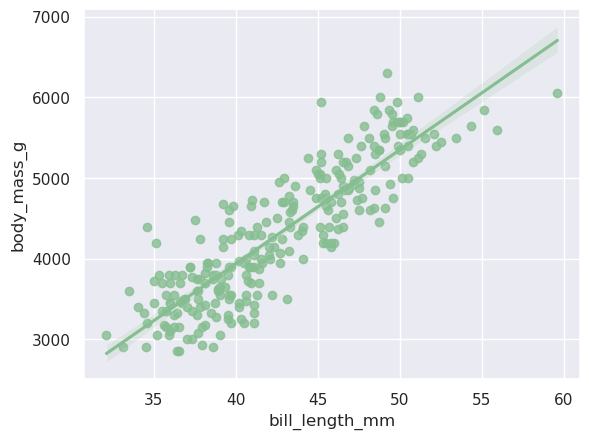

In [46]:
# Visualising Regression Line
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)

## Checking Model Assumptions

**4 key assumptions for linear regression**
1. Linearity
2. Normality
3. Independent observations
4. Homoscedasticity

### Checking normality of the residuals

In [48]:
# x variable 
X = ols_data['bill_length_mm']

# Prediction from the model
fitted_values = model.predict(X)

# Calculate residuals from the model
residuals = model.resid

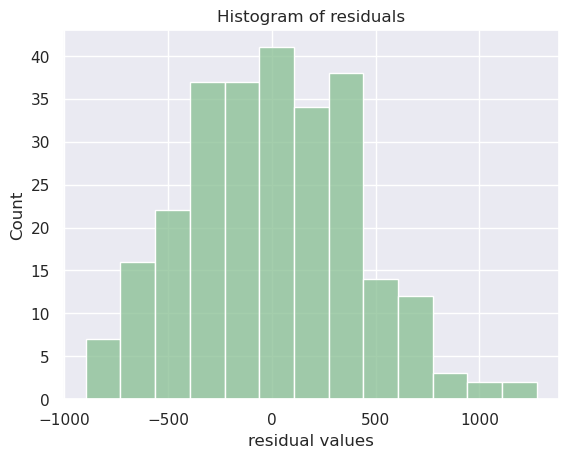

In [49]:
import matplotlib.pyplot as plt

fig = sns.histplot(residuals)
fig.set_xlabel("residual values")
fig.set_title("Histogram of residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the qqplot function from the statsmodels.api package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution

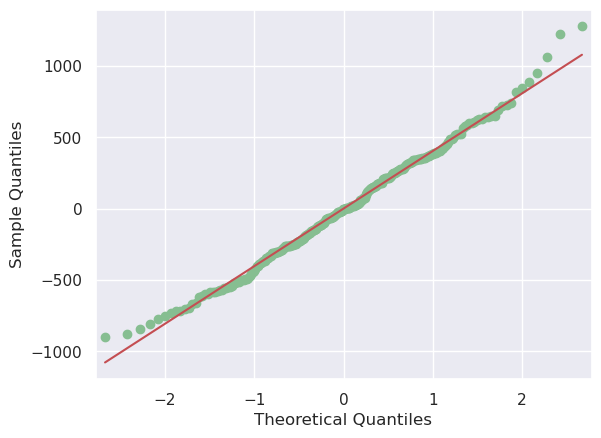

In [50]:
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='s')
plt.show()

### Checking Homoscedasticity assumption

we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

You can create one scatterplot by using the `scatterplot()` function from the `seaborn` package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

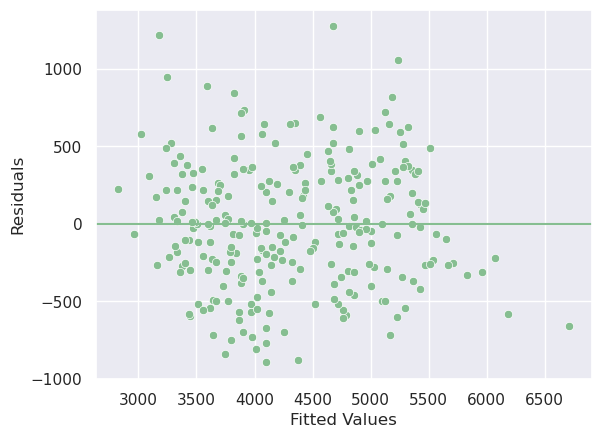

In [52]:
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add a reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

